In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, math

In [2]:
def perspective_if_only_one_card_img(image):

    ## contour를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contour, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # contour를 바탕으로 사각형의 좌표를 찾는 작업
    rect = cv2.minAreaRect(contour[0])
    box = cv2.boxPoints(rect)
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    
    # If card is horizontally oriented
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp

    # If card is vertically oriented
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight), borderValue = (255,255,255)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

In [11]:
def perspective2(image):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255

    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
    for rect in rects:
        box = cv2.boxPoints(rect)
        box = box.astype('int')
#         img2 = cv2.drawContours(img, [box], -1, (0, 0, 255), 5)
        
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight), borderValue = (255,255,255)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

In [3]:
data_loc = '../big_au/sample1/'
decklist = os.listdir(data_loc)
cardlist=[]
for i in os.listdir(data_loc):    ## 이거 왜 하는지 이유를 모르겠어요. 실제로 decklist == cardlist입니당! (생각해보니 이전에는 deck이 여러개여서 그랬던것같긴하네요)
    cardlist.append(i)

imglist = []
for i in cardlist:
    tmpimg = cv2.imread(data_loc+i)
    imglist.append(tmpimg)
imglist = np.array(imglist)
"""
## numpy 이용한거
imglist = np.zeros((len(cardlist), 170, 150, 3))
n=0
for i in cardlist:
    tmpimg = cv2.imread(data_loc+i)
    imglist[n]=tmpimg
    n+=1
"""


'\n## numpy 이용한거\nimglist = np.zeros((len(cardlist), 170, 150, 3))\nn=0\nfor i in cardlist:\n    tmpimg = cv2.imread(data_loc+i)\n    imglist[n]=tmpimg\n    n+=1\n'

In [4]:
decklist==cardlist

True

## 원본 카드 데이터 입력

In [5]:
cardlist=[]
for i in os.listdir('../dataset/'+'card_deck1'):
    cardlist.append(i[:-4])
print(np.array(cardlist))

['C10' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CA' 'CJ' 'CK' 'CQ' 'D10'
 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'DA' 'DJ' 'DK' 'DQ' 'H10' 'H2'
 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9' 'HA' 'HJ' 'HK' 'HQ' 'S10' 'S2' 'S3'
 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'SA' 'SJ' 'SK' 'SQ']


In [6]:
cards = []
for i in os.listdir('../dataset/card_deck1'):
#     print(i)
    cards.append(cv2.imread('../dataset/card_deck1/'+i, cv2.IMREAD_GRAYSCALE))
cards = np.array(cards)

"""
## numpy 이용한거 / numpy를 이용하니 datatype이 float으로 나눠서 나중에 absdiff계산할때 문제생기네요! 참고하세요
origin_card = os.listdir('../dataset/card_deck1')

cards = np.zeros((len(origin_card), 120, 100))
n=0
for i in origin_card:
    tmpimg = cv2.imread('../dataset/card_deck1/'+i, cv2.IMREAD_GRAYSCALE)
    cards[n]=tmpimg
    n+=1
"""

"\n## numpy 이용한거 / numpy를 이용하니 datatype이 float으로 나눠서 나중에 absdiff계산할때 문제생기네요! 참고하세요\norigin_card = os.listdir('../dataset/card_deck1')\n\ncards = np.zeros((len(origin_card), 120, 100))\nn=0\nfor i in origin_card:\n    tmpimg = cv2.imread('../dataset/card_deck1/'+i, cv2.IMREAD_GRAYSCALE)\n    cards[n]=tmpimg\n    n+=1\n"

## 1개만 시범삼아 해봄

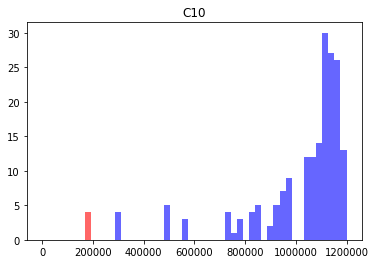

In [7]:
authentic = []
imposter = []
for i in range(len(imglist)):
    warp, _ =perspective_if_only_one_card_img(imglist[i])
    diff_img = cv2.absdiff(cards[0],warp)
    if i > 3: 
        imposter.append(diff_img.sum()) ### 코드 원본은 authentic인데.. 3을 넘어가면 틀린거니깐 사실 imposter에요!
    else: 
        authentic.append(diff_img.sum()) ### 코드 원본은 imposter인데.. 3이전엔 맞는거니깐 사실 authentic에요!
authentic = np.array(authentic)
imposter = np.array(imposter)
plt.hist(authentic, range=[0,1200000],  color = 'r',  bins=50, alpha = 0.6)
plt.hist(imposter, range=[0,1200000],  color = 'b',  bins=50, alpha = 0.6)
plt.title('C10')
plt.show()

## 전체 코드 돌리기 
#### 라벨링을 따로 하지 않고 그냥 순서에 맞게..
근데 이거 순서맞는거겠죠?

#### 순서확인부터

In [8]:
os.listdir('../dataset/card_deck1')

['C10.jpg',
 'C2.jpg',
 'C3.jpg',
 'C4.jpg',
 'C5.jpg',
 'C6.jpg',
 'C7.jpg',
 'C8.jpg',
 'C9.jpg',
 'CA.jpg',
 'CJ.jpg',
 'CK.jpg',
 'CQ.jpg',
 'D10.jpg',
 'D2.jpg',
 'D3.jpg',
 'D4.jpg',
 'D5.jpg',
 'D6.jpg',
 'D7.jpg',
 'D8.jpg',
 'D9.jpg',
 'DA.jpg',
 'DJ.jpg',
 'DK.jpg',
 'DQ.jpg',
 'H10.jpg',
 'H2.jpg',
 'H3.jpg',
 'H4.jpg',
 'H5.jpg',
 'H6.jpg',
 'H7.jpg',
 'H8.jpg',
 'H9.jpg',
 'HA.jpg',
 'HJ.jpg',
 'HK.jpg',
 'HQ.jpg',
 'S10.jpg',
 'S2.jpg',
 'S3.jpg',
 'S4.jpg',
 'S5.jpg',
 'S6.jpg',
 'S7.jpg',
 'S8.jpg',
 'S9.jpg',
 'SA.jpg',
 'SJ.jpg',
 'SK.jpg',
 'SQ.jpg']

In [9]:
decklist

['C10_0_3176.jpg',
 'C10_0_5629.jpg',
 'C10_0_66.jpg',
 'C10_0_6877.jpg',
 'C2_0_1668.jpg',
 'C2_0_2019.jpg',
 'C2_0_57.jpg',
 'C2_0_6378.jpg',
 'C3_0_1267.jpg',
 'C3_0_4047.jpg',
 'C3_0_5623.jpg',
 'C3_0_6840.jpg',
 'C4_0_6374.jpg',
 'C4_0_6533.jpg',
 'C4_0_7608.jpg',
 'C4_0_9176.jpg',
 'C5_0_2642.jpg',
 'C5_0_3505.jpg',
 'C5_0_3658.jpg',
 'C5_0_6805.jpg',
 'C6_0_1626.jpg',
 'C6_0_3919.jpg',
 'C6_0_7200.jpg',
 'C6_0_7383.jpg',
 'C7_0_2558.jpg',
 'C7_0_3545.jpg',
 'C7_0_5584.jpg',
 'C7_0_6577.jpg',
 'C8_0_1147.jpg',
 'C8_0_5711.jpg',
 'C8_0_5963.jpg',
 'C8_0_7039.jpg',
 'C9_0_1733.jpg',
 'C9_0_1823.jpg',
 'C9_0_5762.jpg',
 'C9_0_8170.jpg',
 'CA_0_1674.jpg',
 'CA_0_4583.jpg',
 'CA_0_544.jpg',
 'CA_0_9581.jpg',
 'CJ_0_1947.jpg',
 'CJ_0_2319.jpg',
 'CJ_0_27.jpg',
 'CJ_0_2920.jpg',
 'CK_0_2290.jpg',
 'CK_0_6145.jpg',
 'CK_0_6672.jpg',
 'CK_0_9302.jpg',
 'CQ_0_2875.jpg',
 'CQ_0_4267.jpg',
 'CQ_0_8209.jpg',
 'CQ_0_8397.jpg',
 'D10_0_6953.jpg',
 'D10_0_8383.jpg',
 'D10_0_8782.jpg',
 'D10_0_98

순서대충맞는거 확인

## 코드 맞는거 확인완료

In [10]:
correct = 0
wrong = 0
authentic = []
imposter = []
for card in range(len(cards)):
    for i in range(len(imglist)):
        warp, _ =perspective2(imglist[i])
        diff_img = cv2.absdiff(cards[card], warp)
        if card == int(i/4): ## card가 0일 때 앞에서 4개, 1일때는 그다음 4개 ,,,
            if diff_img.sum()>200000:
                wrong+=1
            
            authentic.append(diff_img.sum())
        else: 
            imposter.append(diff_img.sum())
            if diff_img.sum()<200000:
                wrong+=1
authentic = np.array(authentic)
imposter = np.array(imposter)
plt.hist(authentic, range=[0,1200000],  color = 'r',  bins=50, alpha = 0.6)
plt.hist(imposter, range=[0,1200000],  color = 'b',  bins=50, alpha = 0.6)
plt.show()

NameError: name 'perspective2' is not defined

In [37]:
wrong

124

## ++ sample2에서도 똑같이 진행해야했고, 진행했음

In [38]:
data_loc = '../big_au/sample2/'
decklist = os.listdir(data_loc)
cardlist=[]
for i in os.listdir(data_loc):    ## 이거 왜 하는지 이유를 모르겠어요. 실제로 decklist == cardlist입니당! (생각해보니 이전에는 deck이 여러개여서 그랬던것같긴하네요)
    cardlist.append(i)

imglist = []
for i in cardlist:
    tmpimg = cv2.imread(data_loc+i)
    imglist.append(tmpimg)
imglist = np.array(imglist)
"""
## numpy 이용한거
imglist = np.zeros((len(cardlist), 170, 150, 3))
n=0
for i in cardlist:
    tmpimg = cv2.imread(data_loc+i)
    imglist[n]=tmpimg
    n+=1
"""


'\n## numpy 이용한거\nimglist = np.zeros((len(cardlist), 170, 150, 3))\nn=0\nfor i in cardlist:\n    tmpimg = cv2.imread(data_loc+i)\n    imglist[n]=tmpimg\n    n+=1\n'

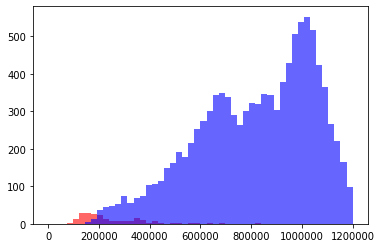

In [39]:
correct = 0
wrong = 0
authentic = []
imposter = []
for card in range(len(cards)):
    for i in range(len(imglist)):
        warp, _ =perspective2(imglist[i])
        diff_img = cv2.absdiff(cards[card], warp)
        if card == int(i/4): ## card가 0일 때 앞에서 4개, 1일때는 그다음 4개 ,,,
            if diff_img.sum()>200000:
                wrong+=1
            
            authentic.append(diff_img.sum())
        else: 
            imposter.append(diff_img.sum())
            if diff_img.sum()<200000:
                wrong+=1
authentic = np.array(authentic)
imposter = np.array(imposter)
plt.hist(authentic, range=[0,1200000],  color = 'r',  bins=50, alpha = 0.6)
plt.hist(imposter, range=[0,1200000],  color = 'b',  bins=50, alpha = 0.6)
plt.show()

In [41]:
wrong

122

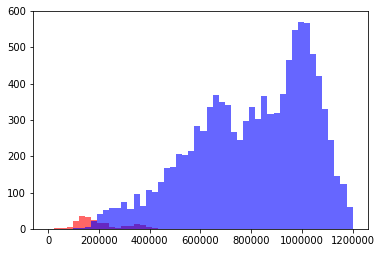

In [12]:
correct = 0
wrong = 0
authentic = []
imposter = []
for card in range(len(cards)):
    for i in range(len(imglist)):
        warp, _ =perspective2(imglist[i])
        diff_img = cv2.absdiff(cards[card], warp)
        if card == int(i/4): ## card가 0일 때 앞에서 4개, 1일때는 그다음 4개 ,,,
            if diff_img.sum()>200000:
                wrong+=1
            
            authentic.append(diff_img.sum())
        else: 
            imposter.append(diff_img.sum())
            if diff_img.sum()<200000:
                wrong+=1
authentic = np.array(authentic)
imposter = np.array(imposter)
plt.hist(authentic, range=[0,1200000],  color = 'r',  bins=50, alpha = 0.6)
plt.hist(imposter, range=[0,1200000],  color = 'b',  bins=50, alpha = 0.6)
plt.show()

In [13]:
wrong

124